In [3]:
import pandas as pd
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from wordcloud import WordCloud
import nltk
import unidecode


In [4]:
#plot frequency graph
def frequency_graph(text, column, n_words):
    all_words = ' '.join([word for word in text[column]])

    tokenizer = nltk.tokenize.WhitespaceTokenizer()
    tokens = tokenizer.tokenize(all_words)
    frequency = nltk.FreqDist(tokens)

    df_frequency = pd.DataFrame({'Word': list(frequency.keys()),
                                 'Frequency': list(frequency.values())})
    
    #selecting the n most frequent words
    df_frequency = df_frequency.nlargest(columns='Frequency', n=n_words)

    #plotting the graph
    plt.figure(figsize=(20,6))
    ax = sns.barplot(data=df_frequency, x='Word', y='Frequency', palette='viridis', hue='Frequency')
    plt.show()

In [5]:
df_posts = pd.read_csv('reddit_artist_posts_sentiment.csv')
df_posts.head()

,text,label
0,pitchfork track review: taylor swift’s “actual...,negative
1,taylor swift has regained the masters of her f...,positive
2,pitchfork review: taylor swift - the life of a...,neutral
3,taylor swift announced engagement,neutral
4,taylor swift - the fate of ophelia (official m...,neutral


In [6]:
df_posts.shape

(31948, 2)

In [7]:
df_posts.drop_duplicates(inplace=True)

In [8]:
df_posts.shape

(30842, 2)

In [9]:
df_posts.value_counts('label')

label
neutral     19039
positive     8510
negative     3293
Name: count, dtype: int64

In [10]:
mask = df_posts['label'] != 'neutral'
df_posts = df_posts[mask]
df_posts.value_counts('label')

label
positive    8510
negative    3293
Name: count, dtype: int64

### BAG OF WORDS

In [11]:
vectorizer = CountVectorizer(lowercase=False, max_features=50)
bag_of_words = vectorizer.fit_transform(df_posts.text)
print(bag_of_words.shape)

(11803, 50)


In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    bag_of_words,
    df_posts.label,
    random_state=4000)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
accuracy = logistic_regression.score(x_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7289


In [13]:
all_words = [palavra for palavra in df_posts.text]
all_words

['pitchfork track review: taylor swift’s “actually romantic” is actually embarrassing',
 'taylor swift has regained the masters of her first six albums.',
 'taylor swift achieves solo artist record 15th no. 1 album on billboard 200 with ‘the life of a showgirl’',
 'lana del rey on taylor swift’s success: ‘she wants it more than anyone’',
 'taylor swift is proof that how we critique music is broken',
 "taylor swift's 'the eras tour' in vienna is canceled due to planned terrorist attack according to local concert organizer",
 'taylor swift makes history as first artist with entire top 10 on billboard hot 100, led by ‘anti-hero’ at no. 1',
 'taylor swift never rerecorded ‘reputation.’ thank god.',
 'taylor swift claims record top 14 spots on billboard hot 100, led by ‘fortnight’ with post malone',
 'billboard’s greatest pop stars of the 21st century: no. 2 — taylor swift',
 'robbie williams admits ‘britpop’ album was delayed to avoid taylor swift clash: “you can’t compete” his album was s

In [14]:
all_words = ' '.join([word for word in df_posts.text])
print(all_words)

pitchfork track review: taylor swift’s “actually romantic” is actually embarrassing taylor swift has regained the masters of her first six albums. taylor swift achieves solo artist record 15th no. 1 album on billboard 200 with ‘the life of a showgirl’ lana del rey on taylor swift’s success: ‘she wants it more than anyone’ taylor swift is proof that how we critique music is broken taylor swift's 'the eras tour' in vienna is canceled due to planned terrorist attack according to local concert organizer taylor swift makes history as first artist with entire top 10 on billboard hot 100, led by ‘anti-hero’ at no. 1 taylor swift never rerecorded ‘reputation.’ thank god. taylor swift claims record top 14 spots on billboard hot 100, led by ‘fortnight’ with post malone billboard’s greatest pop stars of the 21st century: no. 2 — taylor swift robbie williams admits ‘britpop’ album was delayed to avoid taylor swift clash: “you can’t compete” his album was slated to release on october 10, and was mo

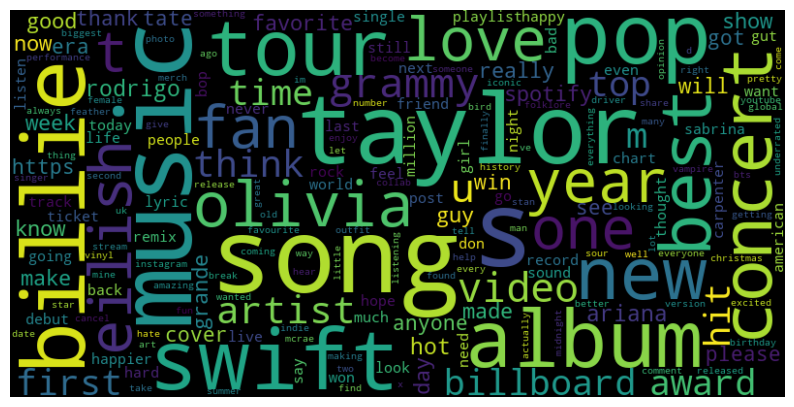

In [15]:
wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
def cloud_for_sentiment(text, text_column, label):

    label_sentiment = text.query(f'label == "{label}"')[text_column]

    all_words = ' '.join([word for word in label_sentiment])

    wordcloud = WordCloud(width=800, height=400, max_font_size=110, collocations=False).generate(all_words)

    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment: {label}', fontsize=16)
    plt.show()

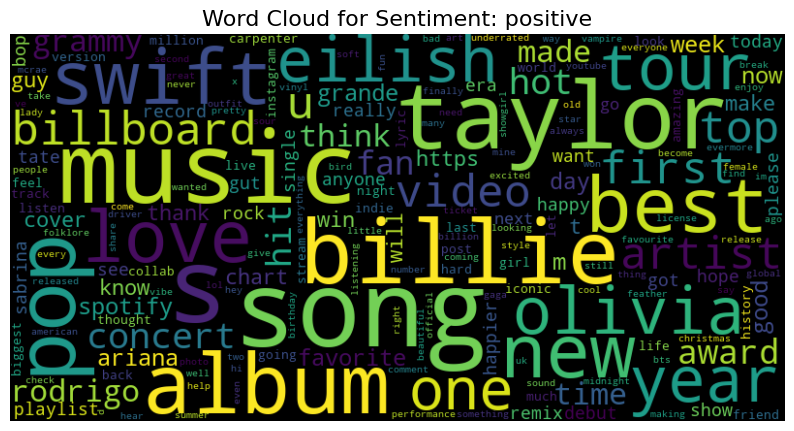

In [17]:
cloud_for_sentiment(df_posts, 'text', 'positive')

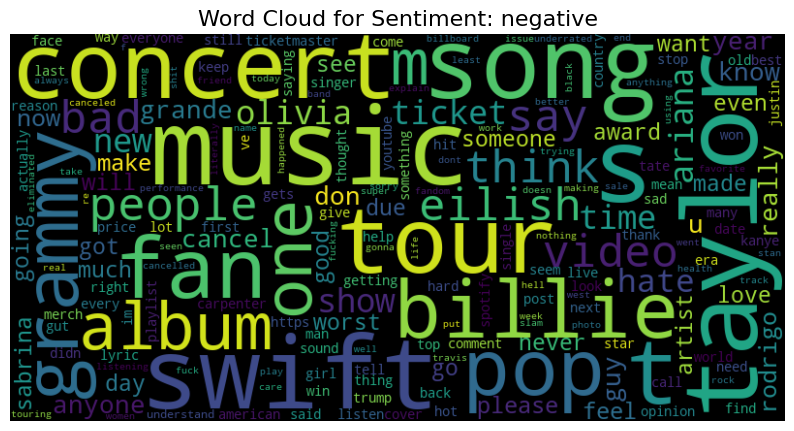

In [18]:
cloud_for_sentiment(df_posts, 'text', 'negative')

In [19]:
tokenizer = nltk.tokenize.WhitespaceTokenizer()
tokens = tokenizer.tokenize(all_words)
tokens


['pitchfork',
 'track',
 'review:',
 'taylor',
 'swift’s',
 '“actually',
 'romantic”',
 'is',
 'actually',
 'embarrassing',
 'taylor',
 'swift',
 'has',
 'regained',
 'the',
 'masters',
 'of',
 'her',
 'first',
 'six',
 'albums.',
 'taylor',
 'swift',
 'achieves',
 'solo',
 'artist',
 'record',
 '15th',
 'no.',
 '1',
 'album',
 'on',
 'billboard',
 '200',
 'with',
 '‘the',
 'life',
 'of',
 'a',
 'showgirl’',
 'lana',
 'del',
 'rey',
 'on',
 'taylor',
 'swift’s',
 'success:',
 '‘she',
 'wants',
 'it',
 'more',
 'than',
 'anyone’',
 'taylor',
 'swift',
 'is',
 'proof',
 'that',
 'how',
 'we',
 'critique',
 'music',
 'is',
 'broken',
 'taylor',
 "swift's",
 "'the",
 'eras',
 "tour'",
 'in',
 'vienna',
 'is',
 'canceled',
 'due',
 'to',
 'planned',
 'terrorist',
 'attack',
 'according',
 'to',
 'local',
 'concert',
 'organizer',
 'taylor',
 'swift',
 'makes',
 'history',
 'as',
 'first',
 'artist',
 'with',
 'entire',
 'top',
 '10',
 'on',
 'billboard',
 'hot',
 '100,',
 'led',
 'by',
 '‘a

In [20]:
frequency = nltk.FreqDist(tokens)
df_frequency = pd.DataFrame({'Word': list(frequency.keys()),
                             'Frequency': list(frequency.values())})

df_frequency.nlargest(columns='Frequency', n=10)

,Word,Frequency
13,the,7794
61,to,4591
447,i,4447
34,a,4095
116,and,4083
15,of,3825
7,is,2932
151,for,2864
57,in,2636
28,on,2323


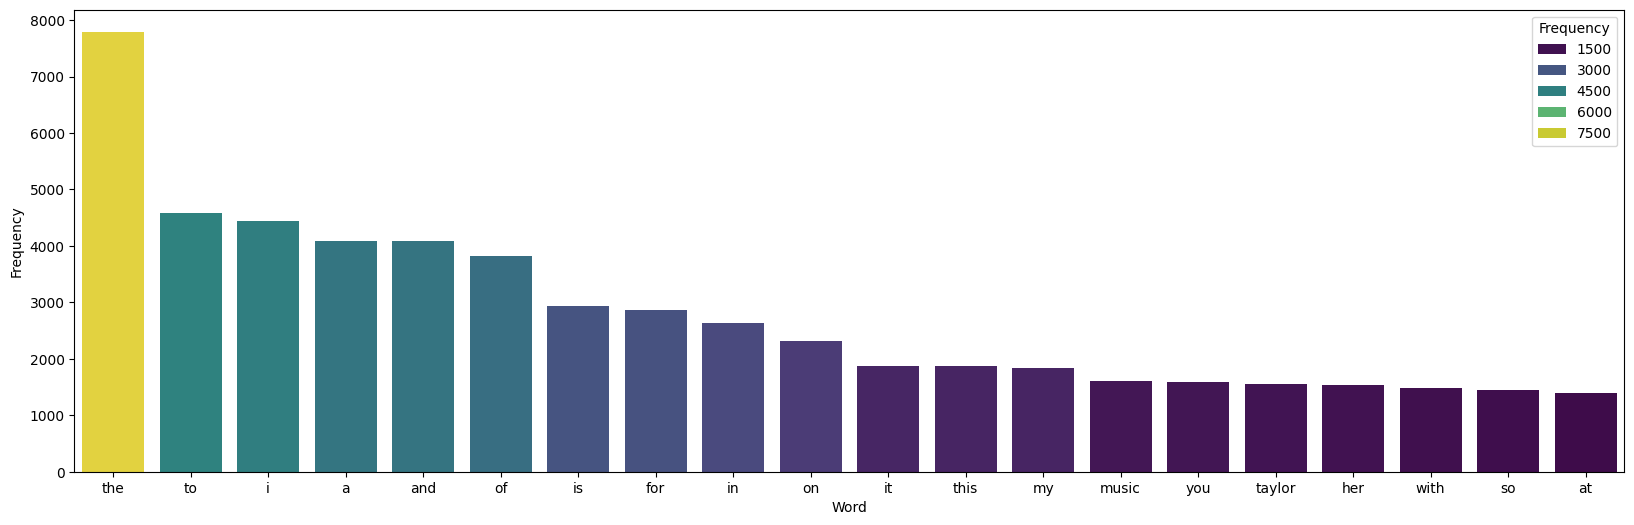

In [21]:
frequency_graph(df_posts, 'text', 20)

### STOPWORDS

In [22]:
stop_words = nltk.corpus.stopwords.words('english')
stop_words

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [23]:
# 1. for each text appply tokenizer
# 2. remove stop words from tokens (list comprehension)
# 3. join all treated tokens into a single string appended to treated_tokens1 list

treated_tokens1 = []

for text in df_posts.text:
    word_tokens = tokenizer.tokenize(text)
    new_text = [word for word in word_tokens if word.lower() not in stop_words]
    treated_tokens1.append(' '.join(new_text))

df_posts['treated_text_1'] = treated_tokens1
df_posts.head()

,text,label,treated_text_1
0,pitchfork track review: taylor swift’s “actual...,negative,pitchfork track review: taylor swift’s “actual...
1,taylor swift has regained the masters of her f...,positive,taylor swift regained masters first six albums.
9,taylor swift achieves solo artist record 15th ...,positive,taylor swift achieves solo artist record 15th ...
10,lana del rey on taylor swift’s success: ‘she w...,positive,lana del rey taylor swift’s success: ‘she want...
13,taylor swift is proof that how we critique mus...,negative,taylor swift proof critique music broken


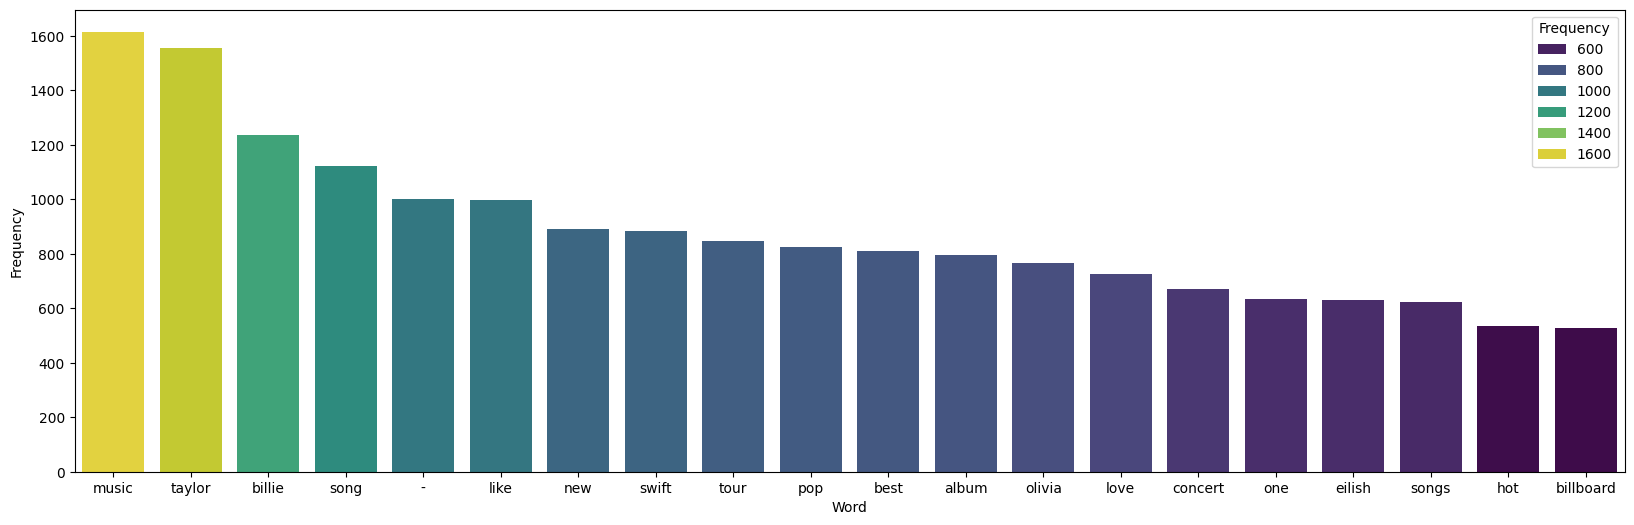

In [24]:
frequency_graph(df_posts, 'treated_text_1', 20)

### PUNCTUATIONS

In [25]:
# 1. for each text appply tokenizer
# 2. remove stop words from tokens (list comprehension)
# 3. join all treated tokens into a single string appended to treated_tokens1 list

tokens_ponctuations = nltk.tokenize.WordPunctTokenizer()

treated_tokens2 = []
for text in df_posts['treated_text_1']:
    word_tokens = tokens_ponctuations.tokenize(text)
    new_text = [word for word in word_tokens if word.isalpha() and word not in stop_words]
    treated_tokens2.append(' '.join(new_text))

df_posts['treated_text_2'] = treated_tokens2
df_posts.head()

,text,label,treated_text_1,treated_text_2
0,pitchfork track review: taylor swift’s “actual...,negative,pitchfork track review: taylor swift’s “actual...,pitchfork track review taylor swift actually r...
1,taylor swift has regained the masters of her f...,positive,taylor swift regained masters first six albums.,taylor swift regained masters first six albums
9,taylor swift achieves solo artist record 15th ...,positive,taylor swift achieves solo artist record 15th ...,taylor swift achieves solo artist record album...
10,lana del rey on taylor swift’s success: ‘she w...,positive,lana del rey taylor swift’s success: ‘she want...,lana del rey taylor swift success wants anyone
13,taylor swift is proof that how we critique mus...,negative,taylor swift proof critique music broken,taylor swift proof critique music broken


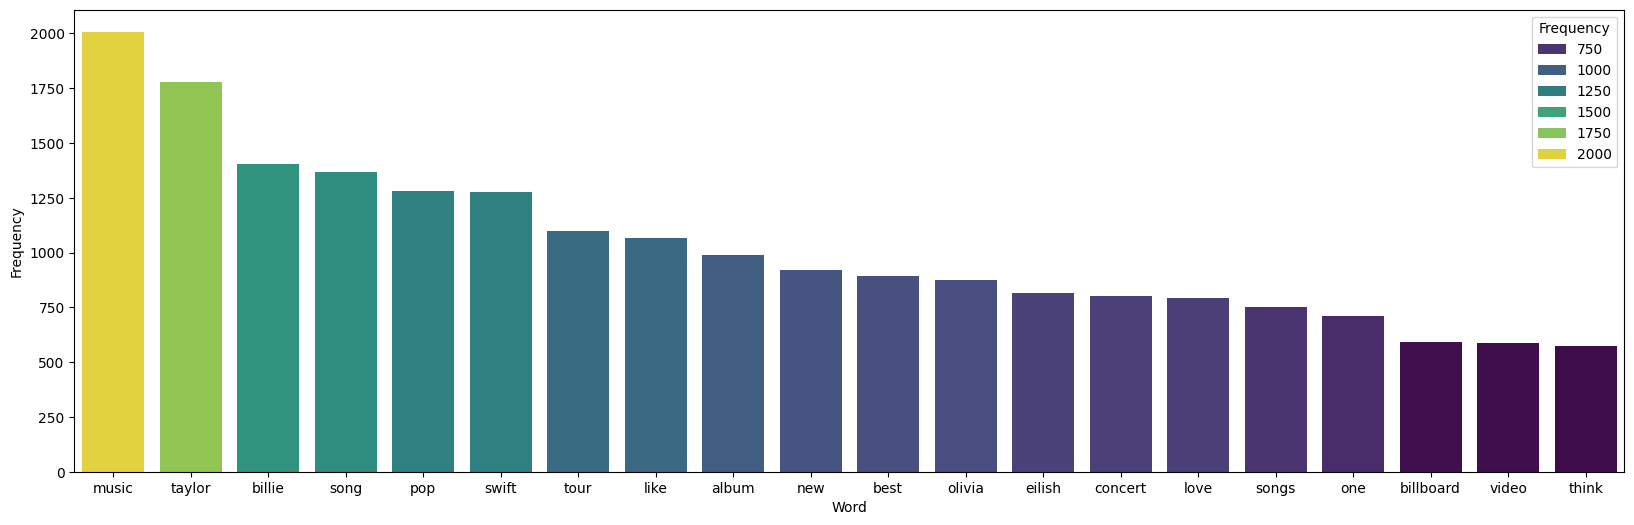

In [26]:
frequency_graph(df_posts, 'treated_text_2', 20)

### STEMMING

In [27]:
stemmer = nltk.stem.PorterStemmer()

In [28]:
# 1. for each text appply tokenizer
# 2. remove stop words from tokens (list comprehension)
# 3. join all treated tokens into a single string appended to treated_tokens1 list

treated_tokens3 = []
for text in df_posts['treated_text_2']:
    word_tokens = tokens_ponctuations.tokenize(text)
    new_text = [ stemmer.stem(word) for word in word_tokens]
    treated_tokens3.append(' '.join(new_text))

df_posts['treated_text_3'] = treated_tokens3
df_posts.head()

,text,label,treated_text_1,treated_text_2,treated_text_3
0,pitchfork track review: taylor swift’s “actual...,negative,pitchfork track review: taylor swift’s “actual...,pitchfork track review taylor swift actually r...,pitchfork track review taylor swift actual rom...
1,taylor swift has regained the masters of her f...,positive,taylor swift regained masters first six albums.,taylor swift regained masters first six albums,taylor swift regain master first six album
9,taylor swift achieves solo artist record 15th ...,positive,taylor swift achieves solo artist record 15th ...,taylor swift achieves solo artist record album...,taylor swift achiev solo artist record album b...
10,lana del rey on taylor swift’s success: ‘she w...,positive,lana del rey taylor swift’s success: ‘she want...,lana del rey taylor swift success wants anyone,lana del rey taylor swift success want anyon
13,taylor swift is proof that how we critique mus...,negative,taylor swift proof critique music broken,taylor swift proof critique music broken,taylor swift proof critiqu music broken


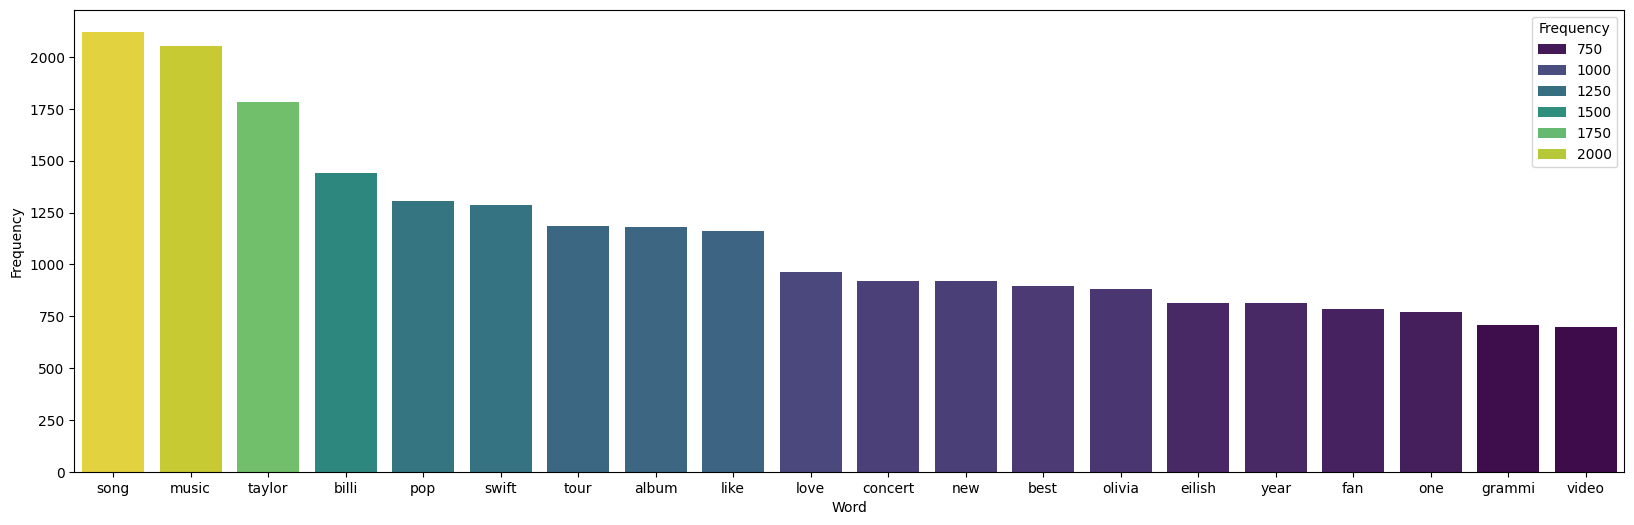

In [29]:
frequency_graph(df_posts, 'treated_text_3', 20)

### TF-IDF

In [30]:
tfidf = TfidfVectorizer(max_features=50)

### TF-IDF

In [31]:
tfidf_treated = tfidf.fit_transform(df_posts['treated_text_3'])

x_train, x_test, y_train, y_test = train_test_split(
    tfidf_treated,
    df_posts['label'],
    random_state=4000)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
accuracy = logistic_regression.score(x_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.7516


N-GRAMS

In [32]:
tfidf_4000 = TfidfVectorizer(max_features=4000, ngram_range=(1,2))

vetor_tfidf = tfidf_4000.fit_transform(df_posts['treated_text_3'])

x_train, x_test, y_train, y_test = train_test_split(
    vetor_tfidf,
    df_posts['label'],
    random_state=4000)

logistic_regression = LogisticRegression()
logistic_regression.fit(x_train, y_train)
accuracy = logistic_regression.score(x_test, y_test)
print(f'Accuracy: {accuracy:.4f}')

Accuracy: 0.8716


In [33]:
tfidf_4000

,"input input: {'filename', 'file', 'content'}, default='content'- If `'filename'`, the sequence passed as an argument to fit is expected to be a list of filenames that need reading to fetch the raw content to analyze.- If `'file'`, the sequence items must have a 'read' method (file-like object) that is called to fetch the bytes in memory.- If `'content'`, the input is expected to be a sequence of items that can be of type string or byte.",'content'
,"encoding encoding: str, default='utf-8'If bytes or files are given to analyze, this encoding is used todecode.",'utf-8'
,"decode_error decode_error: {'strict', 'ignore', 'replace'}, default='strict'Instruction on what to do if a byte sequence is given to analyze thatcontains characters not of the given `encoding`. By default, it is'strict', meaning that a UnicodeDecodeError will be raised. Othervalues are 'ignore' and 'replace'.",'strict'
,"strip_accents strip_accents: {'ascii', 'unicode'} or callable, default=NoneRemove accents and perform other character normalizationduring the preprocessing step.'ascii' is a fast method that only works on characters that havea direct ASCII mapping.'unicode' is a slightly slower method that works on any characters.None (default) means no character normalization is performed.Both 'ascii' and 'unicode' use NFKD normalization from:func:`unicodedata.normalize`.",None
,"lowercase lowercase: bool, default=TrueConvert all characters to lowercase before tokenizing.",True
,"preprocessor preprocessor: callable, default=NoneOverride the preprocessing (string transformation) stage whilepreserving the tokenizing and n-grams generation steps.Only applies if ``analyzer`` is not callable.",None
,"tokenizer tokenizer: callable, default=NoneOverride the string tokenization step while preserving thepreprocessing and n-grams generation steps.Only applies if ``analyzer == 'word'``.",None
,"analyzer analyzer: {'word', 'char', 'char_wb'} or callable, default='word'Whether the feature should be made of word or character n-grams.Option 'char_wb' creates character n-grams only from text insideword boundaries; n-grams at the edges of words are padded with space.If a callable is passed it is used to extract the sequence of featuresout of the raw, unprocessed input... versionchanged:: 0.21 Since v0.21, if ``input`` is ``'filename'`` or ``'file'``, the data is first read from the file and then passed to the given callable analyzer.",'word'
,"stop_words stop_words: {'english'}, list, default=NoneIf a string, it is passed to _check_stop_list and the appropriate stoplist is returned. 'english' is currently the only supported stringvalue.There are several known issues with 'english' and you shouldconsider an alternative (see :ref:`stop_words`).If a list, that list is assumed to contain stop words, all of whichwill be removed from the resulting tokens.Only applies if ``analyzer == 'word'``.If None, no stop words will be used. In this case, setting `max_df`to a higher value, such as in the range (0.7, 1.0), can automatically detectand filter stop words based on intra corpus document frequency of terms.",None
,"token_pattern token_pattern: str, default=r""(?u)\\b\\w\\w+\\b""Regular expression denoting what constitutes a ""token"", only usedif ``analyzer == 'word'``. The default regexp selects tokens of 2or more alphanumeric characters (punctuation is completely ignoredand always treated as a token separator).If there is a capturing group in token_pattern then thecaptured group content, not the entire match, becomes the token.At most one capturing group is permitted.",'(?u)\\b\\w\\w+\\b'
,"ngram_range ngram_range: tuple (min_n, max_n), default=(1, 1)The lower and upper boundary of the range of n-values for differentn-grams to be extracted. All values of n such that min_n <= n <= max_nwill be used. For example an ``ngram_range`` of ``(1, 1)`` means onlyunigrams, ``(1, 2)`` means unigrams and bigrams, and ``(2, 2)`` meansonly bigrams.Only applies if ``analyzer`` is not callable.","(1

In [34]:
joblib.dump(logistic_regression, 'sentiment_model.pkl')
joblib.dump(tfidf_4000, 'vectorizer.pkl')

['vectorizer.pkl']

### Processar novas avaliações

In [40]:
palavras_irrelevantes = nltk.corpus.stopwords.words('english')
token_pontuacao = nltk.tokenize.WordPunctTokenizer()
stemmer = nltk.stem.PorterStemmer()

def preprocessar_avaliacao(avaliacao):
    #passo 1
    tokens = token_pontuacao.tokenize(avaliacao)

    #passo 2
    frase_processada = [palavra for palavra in tokens if palavra.lower() not in palavras_irrelevantes]

    #passo 3
    frase_processada = [palavra for palavra in frase_processada if palavra.isalpha()]

    #passo 5
    frase_processada = [stemmer.stem(palavra) for palavra in frase_processada]

    return ' '.join(frase_processada)

In [43]:
novas_avaliacoes = [
    "I absolutely love Taylor Swift! She's fantastic and makes me so happy.",
    "This is terrible and very bad thing that Ariana Grande would say, ugh.",
    "HOW AMAZING IS BILLIE EILISH!!!"
]

In [44]:
novas_avaliacoes_processadas = [preprocessar_avaliacao(avaliacao) for avaliacao in novas_avaliacoes]
novas_avaliacoes_processadas

['absolut love taylor swift fantast make happi',
 'terribl bad thing ariana grand would say ugh',
 'amaz billi eilish']

In [45]:
novas_avaliacoes_tfidf = tfidf_4000.transform(novas_avaliacoes_processadas)

predicoes = logistic_regression.predict(novas_avaliacoes_tfidf)

df_previsoes = pd.DataFrame({
    'Avaliação': novas_avaliacoes,
    'Predição': predicoes
})

df_previsoes

,Avaliação,Predição
0,I absolutely love Taylor Swift! She's fantasti...,positive
1,This is terrible and very bad thing that Arian...,negative
2,HOW AMAZING IS BILLIE EILISH!!!,positive
